In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.integrate as integrate
import scipy.optimize as optimize

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
sess = tf.InteractiveSession()

In [5]:
saver = tf.train.import_meta_graph('mnist/conv_99_new.meta')

In [6]:
saver.restore(sess,'mnist/conv_99_new')

INFO:tensorflow:Restoring parameters from mnist/conv_99_new


In [7]:
print(tf.global_variables())

[<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(3136, 1024) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(1024, 10) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>, <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable/Adam:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable/Adam_1:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2/Adam:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_2

In [8]:
keep_prob = tf.get_default_graph().get_tensor_by_name("keep_prob:0")
x = tf.get_default_graph().get_tensor_by_name("x:0")
y_conv = tf.get_default_graph().get_tensor_by_name("y_conv:0")
y_conv_s = tf.get_default_graph().get_tensor_by_name("y_conv_s:0")

# Let's create a 3 pixel shifting image

In [9]:
pic = mnist.train.images[7]

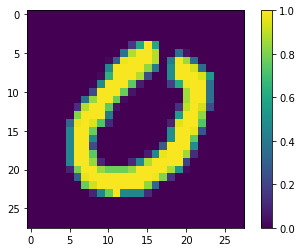

In [10]:
plt.imshow(pic.reshape([28,28]))
plt.colorbar()

In [11]:
def make_pix_pic(coords=[(14,14)]):
    init_pic = np.zeros(784)
    init_pic = init_pic.reshape([28,28])
    for i, co in enumerate(coords):
        init_pic[co] = 0.99
    return init_pic.reshape(784)

In [12]:
init_pic = np.zeros(784)
init_pic = init_pic.reshape([28,28])
init_pic[14, 10] = 0.9

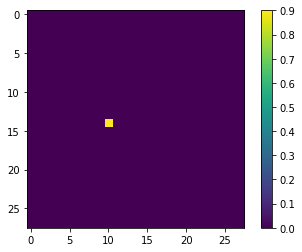

In [13]:
plt.imshow(init_pic)
plt.colorbar()

# Let's compute the geodesics..

In [14]:
def norm(x):
    return np.sqrt(np.sum(x**2))

In [15]:
def callbak(x,convergence):
    print('x is: ', x)
    print('val is: ', convergence)

In [16]:
te=optimize.differential_evolution(norm, bounds=[(0,1), (0,1), (0,1), (0.1,1)], disp=True)

differential_evolution step 1: f(x)= 0.381722
differential_evolution step 2: f(x)= 0.352135
differential_evolution step 3: f(x)= 0.218454
differential_evolution step 4: f(x)= 0.185626
differential_evolution step 5: f(x)= 0.167079
differential_evolution step 6: f(x)= 0.133429
differential_evolution step 7: f(x)= 0.133429
differential_evolution step 8: f(x)= 0.115673
differential_evolution step 9: f(x)= 0.115673
differential_evolution step 10: f(x)= 0.115673
differential_evolution step 11: f(x)= 0.115673
differential_evolution step 12: f(x)= 0.115673
differential_evolution step 13: f(x)= 0.115673
differential_evolution step 14: f(x)= 0.115673
differential_evolution step 15: f(x)= 0.106367
differential_evolution step 16: f(x)= 0.106367
differential_evolution step 17: f(x)= 0.106367
differential_evolution step 18: f(x)= 0.10348
differential_evolution step 19: f(x)= 0.102998
differential_evolution step 20: f(x)= 0.102998
differential_evolution step 21: f(x)= 0.102998
differential_evolution 

In [17]:
te

     fun: 0.1
     jac: array([5.13478149e-08, 5.13478149e-08, 5.13478149e-08, 9.99999999e-01])
 message: 'Optimization terminated successfully.'
    nfev: 2650
     nit: 43
 success: True
       x: array([0. , 0. , 0. , 0.1])

In [18]:
def shift_pic(pic, shift=4):
    return np.roll(pic.reshape([28,28]), shift, axis=1).reshape([784,])

In [19]:
def apply_scalar_padding(x, unpadded_coords=[(14,15)]):
    pic = np.zeros([28, 28])
    pic[unpadded_coords] = x
    return pic.reshape(784)

In [20]:
def apply_padding(x, unpadded_coords=[(14, 13), (14,14), (14,15), (14,16)]):
    #pic = np.zeros([28, 28])
    pic = 1/100.*np.random.rand(28, 28)
    for i, coords in enumerate(unpadded_coords):
        pic[coords] = x[i]
    return pic.reshape(784)

In [21]:
def create_vec_tensor(categories, target = y_conv_s):
    vec_tens = []
    for i in range(categories):
            vec_tens.append(tf.gradients(target[:,i], x)[0])
    return vec_tens

In [22]:
vec_tens = create_vec_tensor(10)
def compute_vec_grad(pic, vec_tens):
    var_grad = sess.run(vec_tens, feed_dict={x: pic.reshape([1,len(pic)]), keep_prob: 1.0})
    return np.asarray(var_grad).reshape([10, 784])

In [23]:
def compute_metric(pic, compute_vec_grad=compute_vec_grad, alpha=0.0, beta=1.0):
    vec_grad = compute_vec_grad(pic, vec_tens)
    #vec_grad = vec_grad/np.sqrt(np.sum(vec_grad**2, axis=1)).reshape([10,1])
    return alpha*np.identity(784) + beta*np.dot(np.transpose(vec_grad),vec_grad)

In [24]:
def interp_integrand(start_pic, end_pic, t, metric=compute_metric):
    curr_pic = (1-t)*start_pic + t*end_pic 
    return np.sqrt( np.dot( np.dot(end_pic-start_pic, metric(curr_pic)), end_pic-start_pic))

In [25]:
def mid_func(midpoint, startpoint, endpoint, metric=compute_metric):
    i = integrate.romberg(lambda t: interp_integrand(startpoint, midpoint, t) + interp_integrand(midpoint, endpoint, t),0,1, tol=1e-1, rtol=1e-4)
    return i

In [26]:
def distance_geod(geod):
    print("integrating geodesic")
    length = 0
    for i in range(len(geod)-1):
        length+=integrate.romberg(lambda t: interp_integrand(geod[i], geod[i+1], t), 0, 1, tol=1e-1, rtol=1e-4)

    return length


def distance_geod_array(geod):
    print("integrating geodesic")
    length = []
    for i in range(len(geod)-1):
        length.append(integrate.romberg(lambda t: interp_integrand(geod[i], geod[i+1], t), 0, 1, tol=1e-1, rtol=1e-4))

    return np.asarray(length)

def top_n_length_ids(geod, n=4):
    return np.argsort(distance_geod_array(geod))[-n:][::-1]

def compute_mid_ids(geod):
    midid = np.floor((len(geod))/2.0)
    lowid = np.ceil(midid/2.0)
    hiid = midid + lowid
    return np.arange(int(lowid), int(hiid))

In [27]:
def minimize_length_step(point_index, geod):
    bounds = [(0,1)]*4
    print('begin diff evolution')
    soln = optimize.differential_evolution(lambda x: mid_func(apply_padding(x), geod[point_index-1,:], geod[point_index+1,:]), bounds=bounds, maxiter=50,popsize=40, recombination=1, disp=True)
    print('end diff evolution')
    print('result was: ', soln['x'])
    return np.asarray(apply_padding(soln['x']))

In [28]:
#returns the geodesic with first index being the pt index and second being the actual point (or picture in the mnist case)
def divide(startpoint, endpoint, num_div):
    pt_divs = np.linspace(0, 1, num=num_div)

    geod = np.ones(len(pt_divs)).reshape([len(pt_divs),1])*startpoint.reshape([1,len(startpoint)]) + pt_divs.reshape([len(pt_divs),1])*(endpoint-startpoint).reshape([1,len(startpoint)])
#     for pt_index in range(len(pt_divs))[1:-1]:
#         geod[pt_index] = make_pix_pic(coords=[(14,14), (14,15)])
    return pt_divs, geod

def refine(geod, num_passes=1, shuffle=True):
    for n in range(num_passes):
        r=np.arange(len(geod))[1:-1]
        if shuffle:
            np.random.shuffle(r)
        for pt_index in r:
            geod[pt_index] = minimize_length_step(pt_index, geod)
    return geod 

def compute_geodesic(startpoint, endpoint, num_div, num_passes=2):
    grid, geod = divide(startpoint, endpoint, num_div)
    length_pass = []
    length_pass.append(distance_geod(geod))
    for n in range(num_passes):
        r=np.arange(len(grid))[1:-1]
        np.random.shuffle(r)
        for pt_index in r:
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass

def compute_geodesic_top_n(startpoint, endpoint, num_div, num_passes=2):
    grid, geod = divide(startpoint, endpoint, num_div)
    length_pass = []
    length_pass.append(distance_geod(geod))
    for n in range(num_passes):
        r=top_n_length_ids(geod)
        print('top indices: ', r)
        np.random.shuffle(r)
        for pt_index in r:
            print("using point: ", pt_index)
            #handle endpoints:
            if pt_index == 0:
                pt_index_to_use = 1
            else:
                pt_index_to_use = pt_index
            geod[pt_index_to_use] = minimize_length_step(pt_index_to_use, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass


def compute_geodesic_spreading(startpoint, endpoint, num_div, num_passes=2):
    grid, geod = divide(startpoint, endpoint, num_div)
    length_pass = []
    length_pass.append(distance_geod(geod))
    r  = compute_mid_ids(geod)
    print(r)
    print(np.arange(len(grid))[1:-1])
    rc = np.setdiff1d(np.arange(len(grid))[1:-1], r)
    print(rc)
    for n in range(num_passes):
        print('top indices: ', r)
        np.random.shuffle(r)
        for pt_index in r:
            print("using point: ", pt_index)
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    for n in range(num_passes):
        np.random.shuffle(rc)
        for pt_index in rc:
            print("using point: ", pt_index)
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass

In [29]:
start_pic = shift_pic(make_pix_pic(),shift=-1)
end_pic =  shift_pic(make_pix_pic(),shift=2)

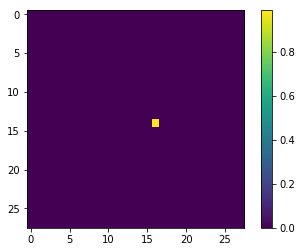

In [30]:
plt.imshow(end_pic.reshape([28,28]))
plt.colorbar()

In [31]:
# bounds = [(0,1)]*3

# soln = optimize.differential_evolution(lambda x: mid_func(apply_padding(x), start_pic, end_pic), bounds=[(0,1),(0,1),(0,1)], maxiter=100,popsize=30, recombination=1, disp=True)

In [32]:
# soln

In [194]:
g = compute_geodesic(start_pic, end_pic, num_div=11, num_passes=6)

integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.0938496
differential_evolution step 2: f(x)= 0.0862846
differential_evolution step 3: f(x)= 0.068082
differential_evolution step 4: f(x)= 0.0620204
differential_evolution step 5: f(x)= 0.059136
differential_evolution step 6: f(x)= 0.059136
differential_evolution step 7: f(x)= 0.059136
differential_evolution step 8: f(x)= 0.0515817
differential_evolution step 9: f(x)= 0.0515817
differential_evolution step 10: f(x)= 0.0515817
differential_evolution step 11: f(x)= 0.0515817
differential_evolution step 12: f(x)= 0.0492945
differential_evolution step 13: f(x)= 0.0492945
differential_evolution step 14: f(x)= 0.0489007
differential_evolution step 15: f(x)= 0.0489007
differential_evolution step 16: f(x)= 0.0489007
differential_evolution step 17: f(x)= 0.0489007
differential_evolution step 18: f(x)= 0.0489007
differential_evolution step 19: f(x)= 0.0489007
differential_evolution step 20: f(x)= 0.0489007
differentia

differential_evolution step 16: f(x)= 0.0549337
differential_evolution step 17: f(x)= 0.0549337
differential_evolution step 18: f(x)= 0.0549337
differential_evolution step 19: f(x)= 0.0549337
differential_evolution step 20: f(x)= 0.0549337
differential_evolution step 21: f(x)= 0.0545881
differential_evolution step 22: f(x)= 0.0545881
differential_evolution step 23: f(x)= 0.0545881
differential_evolution step 24: f(x)= 0.0545881
differential_evolution step 25: f(x)= 0.0545881
differential_evolution step 26: f(x)= 0.0545881
differential_evolution step 27: f(x)= 0.0545881
differential_evolution step 28: f(x)= 0.0544356
differential_evolution step 29: f(x)= 0.0544356
differential_evolution step 30: f(x)= 0.0544356
differential_evolution step 31: f(x)= 0.0540238
differential_evolution step 32: f(x)= 0.0540238
differential_evolution step 33: f(x)= 0.0540238
differential_evolution step 34: f(x)= 0.0540238
differential_evolution step 35: f(x)= 0.0540238
differential_evolution step 36: f(x)= 0.

differential_evolution step 32: f(x)= 0.0346529
differential_evolution step 33: f(x)= 0.0346529
differential_evolution step 34: f(x)= 0.0346529
differential_evolution step 35: f(x)= 0.0346529
differential_evolution step 36: f(x)= 0.0346529
differential_evolution step 37: f(x)= 0.0346529
differential_evolution step 38: f(x)= 0.0346529
differential_evolution step 39: f(x)= 0.0346529
differential_evolution step 40: f(x)= 0.0346529
differential_evolution step 41: f(x)= 0.0346529
differential_evolution step 42: f(x)= 0.0346529
differential_evolution step 43: f(x)= 0.0346529
differential_evolution step 44: f(x)= 0.0346529
differential_evolution step 45: f(x)= 0.0346529
differential_evolution step 46: f(x)= 0.0346529
differential_evolution step 47: f(x)= 0.0346529
differential_evolution step 48: f(x)= 0.0346529
differential_evolution step 49: f(x)= 0.0339656
differential_evolution step 50: f(x)= 0.0339656
end diff evolution
result was:  [0.34269969 0.18239521 0.00305598 0.70910352]
begin diff

differential_evolution step 47: f(x)= 0.0336434
differential_evolution step 48: f(x)= 0.0336434
differential_evolution step 49: f(x)= 0.0336434
differential_evolution step 50: f(x)= 0.0336434
end diff evolution
result was:  [0.34012631 0.1523374  0.00926122 0.69534045]
begin diff evolution
differential_evolution step 1: f(x)= 0.0802704
differential_evolution step 2: f(x)= 0.0802012
differential_evolution step 3: f(x)= 0.0802012
differential_evolution step 4: f(x)= 0.069788
differential_evolution step 5: f(x)= 0.069788
differential_evolution step 6: f(x)= 0.069788
differential_evolution step 7: f(x)= 0.069788
differential_evolution step 8: f(x)= 0.069788
differential_evolution step 9: f(x)= 0.069788
differential_evolution step 10: f(x)= 0.069788
differential_evolution step 11: f(x)= 0.069788
differential_evolution step 12: f(x)= 0.069788
differential_evolution step 13: f(x)= 0.069788
differential_evolution step 14: f(x)= 0.069788
differential_evolution step 15: f(x)= 0.069788
differenti

differential_evolution step 11: f(x)= 0.0272197
differential_evolution step 12: f(x)= 0.0272197
differential_evolution step 13: f(x)= 0.0270666
differential_evolution step 14: f(x)= 0.0266224
differential_evolution step 15: f(x)= 0.0266224
differential_evolution step 16: f(x)= 0.0261929
differential_evolution step 17: f(x)= 0.0261929
differential_evolution step 18: f(x)= 0.0255372
differential_evolution step 19: f(x)= 0.0255372
differential_evolution step 20: f(x)= 0.0255372
differential_evolution step 21: f(x)= 0.0255372
differential_evolution step 22: f(x)= 0.024936
differential_evolution step 23: f(x)= 0.024936
differential_evolution step 24: f(x)= 0.024936
differential_evolution step 25: f(x)= 0.024936
differential_evolution step 26: f(x)= 0.024936
differential_evolution step 27: f(x)= 0.024936
differential_evolution step 28: f(x)= 0.024936
differential_evolution step 29: f(x)= 0.024936
differential_evolution step 30: f(x)= 0.024936
differential_evolution step 31: f(x)= 0.024936
di

differential_evolution step 27: f(x)= 0.0426
differential_evolution step 28: f(x)= 0.0426
differential_evolution step 29: f(x)= 0.0426
differential_evolution step 30: f(x)= 0.0417246
differential_evolution step 31: f(x)= 0.0417246
differential_evolution step 32: f(x)= 0.0417246
differential_evolution step 33: f(x)= 0.0417246
differential_evolution step 34: f(x)= 0.0417246
differential_evolution step 35: f(x)= 0.0417246
differential_evolution step 36: f(x)= 0.0417246
differential_evolution step 37: f(x)= 0.0417246
differential_evolution step 38: f(x)= 0.0417246
differential_evolution step 39: f(x)= 0.0417246
differential_evolution step 40: f(x)= 0.0417246
differential_evolution step 41: f(x)= 0.0417246
differential_evolution step 42: f(x)= 0.0417246
differential_evolution step 43: f(x)= 0.0417246
differential_evolution step 44: f(x)= 0.0417246
differential_evolution step 45: f(x)= 0.0417246
differential_evolution step 46: f(x)= 0.0417246
differential_evolution step 47: f(x)= 0.0417246
d

differential_evolution step 43: f(x)= 0.0261466
differential_evolution step 44: f(x)= 0.0261466
differential_evolution step 45: f(x)= 0.0260396
differential_evolution step 46: f(x)= 0.0260396
differential_evolution step 47: f(x)= 0.0260396
differential_evolution step 48: f(x)= 0.0258988
differential_evolution step 49: f(x)= 0.0258988
differential_evolution step 50: f(x)= 0.0258988
end diff evolution
result was:  [0.8072704  0.07448303 0.10891683 0.11249645]
begin diff evolution
differential_evolution step 1: f(x)= 0.0576392
differential_evolution step 2: f(x)= 0.0565542
differential_evolution step 3: f(x)= 0.0543574
differential_evolution step 4: f(x)= 0.0543574
differential_evolution step 5: f(x)= 0.0515591
differential_evolution step 6: f(x)= 0.0507428
differential_evolution step 7: f(x)= 0.0507428
differential_evolution step 8: f(x)= 0.0488247
differential_evolution step 9: f(x)= 0.0451452
differential_evolution step 10: f(x)= 0.0451452
differential_evolution step 11: f(x)= 0.044476

differential_evolution step 7: f(x)= 0.0594203
differential_evolution step 8: f(x)= 0.0568116
differential_evolution step 9: f(x)= 0.0561956
differential_evolution step 10: f(x)= 0.055383
differential_evolution step 11: f(x)= 0.055383
differential_evolution step 12: f(x)= 0.055383
differential_evolution step 13: f(x)= 0.055383
differential_evolution step 14: f(x)= 0.055383
differential_evolution step 15: f(x)= 0.055383
differential_evolution step 16: f(x)= 0.0552425
differential_evolution step 17: f(x)= 0.0552425
differential_evolution step 18: f(x)= 0.0552425
differential_evolution step 19: f(x)= 0.055136
differential_evolution step 20: f(x)= 0.055136
differential_evolution step 21: f(x)= 0.0538264
differential_evolution step 22: f(x)= 0.0538264
differential_evolution step 23: f(x)= 0.0538264
differential_evolution step 24: f(x)= 0.0538264
differential_evolution step 25: f(x)= 0.0538264
differential_evolution step 26: f(x)= 0.0538264
differential_evolution step 27: f(x)= 0.0538264
dif

differential_evolution step 23: f(x)= 0.0199978
differential_evolution step 24: f(x)= 0.0199978
differential_evolution step 25: f(x)= 0.0199978
differential_evolution step 26: f(x)= 0.0199978
differential_evolution step 27: f(x)= 0.0199978
differential_evolution step 28: f(x)= 0.0199978
differential_evolution step 29: f(x)= 0.0199978
differential_evolution step 30: f(x)= 0.0177095
differential_evolution step 31: f(x)= 0.0177095
differential_evolution step 32: f(x)= 0.0177095
differential_evolution step 33: f(x)= 0.0177095
differential_evolution step 34: f(x)= 0.0177095
differential_evolution step 35: f(x)= 0.0177095
differential_evolution step 36: f(x)= 0.0177095
differential_evolution step 37: f(x)= 0.0177095
differential_evolution step 38: f(x)= 0.0177095
differential_evolution step 39: f(x)= 0.0177095
differential_evolution step 40: f(x)= 0.0177095
differential_evolution step 41: f(x)= 0.0177095
differential_evolution step 42: f(x)= 0.0177095
differential_evolution step 43: f(x)= 0.

differential_evolution step 38: f(x)= 0.0262172
differential_evolution step 39: f(x)= 0.0262172
differential_evolution step 40: f(x)= 0.0262172
differential_evolution step 41: f(x)= 0.0262172
differential_evolution step 42: f(x)= 0.0262172
differential_evolution step 43: f(x)= 0.0262172
differential_evolution step 44: f(x)= 0.0262172
differential_evolution step 45: f(x)= 0.0262172
differential_evolution step 46: f(x)= 0.0262172
differential_evolution step 47: f(x)= 0.0262172
differential_evolution step 48: f(x)= 0.0243122
differential_evolution step 49: f(x)= 0.0243122
differential_evolution step 50: f(x)= 0.0243122
end diff evolution
result was:  [0.28742996 0.17449038 0.08883266 0.68573343]
begin diff evolution
differential_evolution step 1: f(x)= 0.0675965
differential_evolution step 2: f(x)= 0.0675965
differential_evolution step 3: f(x)= 0.0675965
differential_evolution step 4: f(x)= 0.0668921
differential_evolution step 5: f(x)= 0.0668921
differential_evolution step 6: f(x)= 0.066

differential_evolution step 2: f(x)= 0.0379154
differential_evolution step 3: f(x)= 0.0379154
differential_evolution step 4: f(x)= 0.0368015
differential_evolution step 5: f(x)= 0.0329054
differential_evolution step 6: f(x)= 0.0285828
differential_evolution step 7: f(x)= 0.0285828
differential_evolution step 8: f(x)= 0.0280777
differential_evolution step 9: f(x)= 0.0245021
differential_evolution step 10: f(x)= 0.0245021
differential_evolution step 11: f(x)= 0.0245021
differential_evolution step 12: f(x)= 0.0245021
differential_evolution step 13: f(x)= 0.0245021
differential_evolution step 14: f(x)= 0.0245021
differential_evolution step 15: f(x)= 0.0243176
differential_evolution step 16: f(x)= 0.0243176
differential_evolution step 17: f(x)= 0.0243176
differential_evolution step 18: f(x)= 0.0243176
differential_evolution step 19: f(x)= 0.0243176
differential_evolution step 20: f(x)= 0.0243176
differential_evolution step 21: f(x)= 0.0243176
differential_evolution step 22: f(x)= 0.0243176


differential_evolution step 18: f(x)= 0.0235684
differential_evolution step 19: f(x)= 0.0208262
differential_evolution step 20: f(x)= 0.0208262
differential_evolution step 21: f(x)= 0.0208262
differential_evolution step 22: f(x)= 0.0208262
differential_evolution step 23: f(x)= 0.0208262
differential_evolution step 24: f(x)= 0.0208262
differential_evolution step 25: f(x)= 0.0208262
differential_evolution step 26: f(x)= 0.0208262
differential_evolution step 27: f(x)= 0.0208262
differential_evolution step 28: f(x)= 0.0208262
differential_evolution step 29: f(x)= 0.0208262
differential_evolution step 30: f(x)= 0.0208262
differential_evolution step 31: f(x)= 0.0208262
differential_evolution step 32: f(x)= 0.0208262
differential_evolution step 33: f(x)= 0.0208262
differential_evolution step 34: f(x)= 0.0208262
differential_evolution step 35: f(x)= 0.0208262
differential_evolution step 36: f(x)= 0.0208262
differential_evolution step 37: f(x)= 0.0208262
differential_evolution step 38: f(x)= 0.

differential_evolution step 34: f(x)= 0.0468032
differential_evolution step 35: f(x)= 0.0468032
differential_evolution step 36: f(x)= 0.0468032
differential_evolution step 37: f(x)= 0.0468032
differential_evolution step 38: f(x)= 0.0468032
differential_evolution step 39: f(x)= 0.0468032
differential_evolution step 40: f(x)= 0.0468032
differential_evolution step 41: f(x)= 0.0468032
differential_evolution step 42: f(x)= 0.0468032
differential_evolution step 43: f(x)= 0.0468032
differential_evolution step 44: f(x)= 0.0468032
differential_evolution step 45: f(x)= 0.0468032
differential_evolution step 46: f(x)= 0.0468032
differential_evolution step 47: f(x)= 0.0468032
differential_evolution step 48: f(x)= 0.0468032
differential_evolution step 49: f(x)= 0.0468032
differential_evolution step 50: f(x)= 0.0468032
end diff evolution
result was:  [0.30954065 0.15357591 0.05869905 0.76546839]
begin diff evolution
differential_evolution step 1: f(x)= 0.079182
differential_evolution step 2: f(x)= 0.

differential_evolution step 50: f(x)= 0.0210549
end diff evolution
result was:  [0.3761117  0.14008373 0.05664422 0.67092133]
begin diff evolution
differential_evolution step 1: f(x)= 0.0651606
differential_evolution step 2: f(x)= 0.0645126
differential_evolution step 3: f(x)= 0.0645126
differential_evolution step 4: f(x)= 0.062839
differential_evolution step 5: f(x)= 0.062839
differential_evolution step 6: f(x)= 0.062839
differential_evolution step 7: f(x)= 0.062839
differential_evolution step 8: f(x)= 0.062839
differential_evolution step 9: f(x)= 0.0571789
differential_evolution step 10: f(x)= 0.0571789
differential_evolution step 11: f(x)= 0.0571789
differential_evolution step 12: f(x)= 0.0571789
differential_evolution step 13: f(x)= 0.0567059
differential_evolution step 14: f(x)= 0.0567059
differential_evolution step 15: f(x)= 0.0566656
differential_evolution step 16: f(x)= 0.0562617
differential_evolution step 17: f(x)= 0.0562617
differential_evolution step 18: f(x)= 0.0554859
dif

differential_evolution step 13: f(x)= 0.0184876
differential_evolution step 14: f(x)= 0.0184876
differential_evolution step 15: f(x)= 0.0184876
differential_evolution step 16: f(x)= 0.0181116
differential_evolution step 17: f(x)= 0.0181116
differential_evolution step 18: f(x)= 0.0181116
differential_evolution step 19: f(x)= 0.0181116
differential_evolution step 20: f(x)= 0.0181116
differential_evolution step 21: f(x)= 0.0181116
differential_evolution step 22: f(x)= 0.0181116
differential_evolution step 23: f(x)= 0.0181116
differential_evolution step 24: f(x)= 0.0181116
differential_evolution step 25: f(x)= 0.0181116
differential_evolution step 26: f(x)= 0.0181116
differential_evolution step 27: f(x)= 0.0181116
differential_evolution step 28: f(x)= 0.0181116
differential_evolution step 29: f(x)= 0.0181116
differential_evolution step 30: f(x)= 0.0181116
differential_evolution step 31: f(x)= 0.0181116
differential_evolution step 32: f(x)= 0.0181116
differential_evolution step 33: f(x)= 0.

differential_evolution step 29: f(x)= 0.0631325
differential_evolution step 30: f(x)= 0.0631325
differential_evolution step 31: f(x)= 0.0631325
differential_evolution step 32: f(x)= 0.0631325
differential_evolution step 33: f(x)= 0.0628959
differential_evolution step 34: f(x)= 0.0628959
differential_evolution step 35: f(x)= 0.0628959
differential_evolution step 36: f(x)= 0.0628959
differential_evolution step 37: f(x)= 0.0628959
differential_evolution step 38: f(x)= 0.0628959
differential_evolution step 39: f(x)= 0.0628959
differential_evolution step 40: f(x)= 0.0628959
differential_evolution step 41: f(x)= 0.0628959
differential_evolution step 42: f(x)= 0.0628959
differential_evolution step 43: f(x)= 0.0628959
differential_evolution step 44: f(x)= 0.0628959
differential_evolution step 45: f(x)= 0.0628959
differential_evolution step 46: f(x)= 0.0628959
differential_evolution step 47: f(x)= 0.0628959
differential_evolution step 48: f(x)= 0.0628959
differential_evolution step 49: f(x)= 0.

differential_evolution step 45: f(x)= 0.0472673
differential_evolution step 46: f(x)= 0.0472673
differential_evolution step 47: f(x)= 0.0472673
differential_evolution step 48: f(x)= 0.0472673
differential_evolution step 49: f(x)= 0.0472673
differential_evolution step 50: f(x)= 0.0472673
end diff evolution
result was:  [0.70341623 0.03229329 0.19958755 0.15644076]
begin diff evolution
differential_evolution step 1: f(x)= 0.0675407
differential_evolution step 2: f(x)= 0.0675407
differential_evolution step 3: f(x)= 0.0675407
differential_evolution step 4: f(x)= 0.0642783
differential_evolution step 5: f(x)= 0.0561356
differential_evolution step 6: f(x)= 0.0561356
differential_evolution step 7: f(x)= 0.0561356
differential_evolution step 8: f(x)= 0.0559675
differential_evolution step 9: f(x)= 0.0559675
differential_evolution step 10: f(x)= 0.0538997
differential_evolution step 11: f(x)= 0.0538997
differential_evolution step 12: f(x)= 0.0538997
differential_evolution step 13: f(x)= 0.050409

In [168]:
gn = compute_geodesic_top_n(start_pic, end_pic, num_div=9, num_passes=6)

integrating geodesic
integrating geodesic
top indices:  [0 7 6 5]
using point:  7
begin diff evolution
differential_evolution step 1: f(x)= 0.37529
differential_evolution step 2: f(x)= 0.361971
differential_evolution step 3: f(x)= 0.361971
differential_evolution step 4: f(x)= 0.335767
differential_evolution step 5: f(x)= 0.335767
differential_evolution step 6: f(x)= 0.335767
differential_evolution step 7: f(x)= 0.335767
differential_evolution step 8: f(x)= 0.335767
differential_evolution step 9: f(x)= 0.335767
differential_evolution step 10: f(x)= 0.335767
differential_evolution step 11: f(x)= 0.335767
differential_evolution step 12: f(x)= 0.335767
differential_evolution step 13: f(x)= 0.335767
differential_evolution step 14: f(x)= 0.321652
differential_evolution step 15: f(x)= 0.321652
differential_evolution step 16: f(x)= 0.321652
differential_evolution step 17: f(x)= 0.318727
differential_evolution step 18: f(x)= 0.318727
differential_evolution step 19: f(x)= 0.313589
differential_e

differential_evolution step 16: f(x)= 0.35036
differential_evolution step 17: f(x)= 0.35036
differential_evolution step 18: f(x)= 0.35036
differential_evolution step 19: f(x)= 0.35036
differential_evolution step 20: f(x)= 0.35036
differential_evolution step 21: f(x)= 0.35036
differential_evolution step 22: f(x)= 0.35036
differential_evolution step 23: f(x)= 0.35036
differential_evolution step 24: f(x)= 0.35036
differential_evolution step 25: f(x)= 0.347232
differential_evolution step 26: f(x)= 0.343465
differential_evolution step 27: f(x)= 0.343465
differential_evolution step 28: f(x)= 0.343465
differential_evolution step 29: f(x)= 0.343465
differential_evolution step 30: f(x)= 0.343465
differential_evolution step 31: f(x)= 0.343465
differential_evolution step 32: f(x)= 0.34283
differential_evolution step 33: f(x)= 0.340305
differential_evolution step 34: f(x)= 0.339297
differential_evolution step 35: f(x)= 0.339297
differential_evolution step 36: f(x)= 0.339297
differential_evolution 

differential_evolution step 32: f(x)= 0.294937
differential_evolution step 33: f(x)= 0.294937
differential_evolution step 34: f(x)= 0.294733
differential_evolution step 35: f(x)= 0.294733
differential_evolution step 36: f(x)= 0.294733
differential_evolution step 37: f(x)= 0.294733
differential_evolution step 38: f(x)= 0.294733
differential_evolution step 39: f(x)= 0.294733
differential_evolution step 40: f(x)= 0.294733
differential_evolution step 41: f(x)= 0.294733
differential_evolution step 42: f(x)= 0.292129
differential_evolution step 43: f(x)= 0.292129
differential_evolution step 44: f(x)= 0.292129
differential_evolution step 45: f(x)= 0.289995
differential_evolution step 46: f(x)= 0.289995
differential_evolution step 47: f(x)= 0.289995
differential_evolution step 48: f(x)= 0.289995
differential_evolution step 49: f(x)= 0.289995
differential_evolution step 50: f(x)= 0.289995
end diff evolution
result was:  [0.79090741 0.15523848 0.7339577  0.06059535]
using point:  7
begin diff ev

differential_evolution step 49: f(x)= 0.283935
differential_evolution step 50: f(x)= 0.283935
end diff evolution
result was:  [0.8493359  0.12594918 0.73945573 0.11136271]
using point:  7
begin diff evolution
differential_evolution step 1: f(x)= 0.333743
differential_evolution step 2: f(x)= 0.333743
differential_evolution step 3: f(x)= 0.333743
differential_evolution step 4: f(x)= 0.333743
differential_evolution step 5: f(x)= 0.32694
differential_evolution step 6: f(x)= 0.32694
differential_evolution step 7: f(x)= 0.316986
differential_evolution step 8: f(x)= 0.314215
differential_evolution step 9: f(x)= 0.309163
differential_evolution step 10: f(x)= 0.306843
differential_evolution step 11: f(x)= 0.306843
differential_evolution step 12: f(x)= 0.306843
differential_evolution step 13: f(x)= 0.306049
differential_evolution step 14: f(x)= 0.306049
differential_evolution step 15: f(x)= 0.306049
differential_evolution step 16: f(x)= 0.30418
differential_evolution step 17: f(x)= 0.30418
diffe

KeyboardInterrupt: 

In [186]:
gs = compute_geodesic_spreading(start_pic, end_pic, num_div=11, num_passes=3)

integrating geodesic
[3 4 5 6 7]
[1 2 3 4 5 6 7 8 9]
[1 2 8 9]
top indices:  [3 4 5 6 7]
using point:  5
begin diff evolution
differential_evolution step 1: f(x)= 0.108024
differential_evolution step 2: f(x)= 0.0790807
differential_evolution step 3: f(x)= 0.0790807
differential_evolution step 4: f(x)= 0.0542157
differential_evolution step 5: f(x)= 0.0542157
differential_evolution step 6: f(x)= 0.0541509
differential_evolution step 7: f(x)= 0.0541509
differential_evolution step 8: f(x)= 0.0541509
differential_evolution step 9: f(x)= 0.0541509
differential_evolution step 10: f(x)= 0.0541194
differential_evolution step 11: f(x)= 0.050598
differential_evolution step 12: f(x)= 0.050598
differential_evolution step 13: f(x)= 0.050589
differential_evolution step 14: f(x)= 0.050589
differential_evolution step 15: f(x)= 0.050589
differential_evolution step 16: f(x)= 0.046647
differential_evolution step 17: f(x)= 0.046647
differential_evolution step 18: f(x)= 0.046647
differential_evolution step 

differential_evolution step 14: f(x)= 0.036119
differential_evolution step 15: f(x)= 0.036119
differential_evolution step 16: f(x)= 0.036119
differential_evolution step 17: f(x)= 0.036119
differential_evolution step 18: f(x)= 0.036119
differential_evolution step 19: f(x)= 0.036119
differential_evolution step 20: f(x)= 0.036119
differential_evolution step 21: f(x)= 0.036119
differential_evolution step 22: f(x)= 0.036119
differential_evolution step 23: f(x)= 0.0355028
differential_evolution step 24: f(x)= 0.0355028
differential_evolution step 25: f(x)= 0.0355028
differential_evolution step 26: f(x)= 0.0355028
differential_evolution step 27: f(x)= 0.0355028
differential_evolution step 28: f(x)= 0.0355028
differential_evolution step 29: f(x)= 0.0355028
differential_evolution step 30: f(x)= 0.0350501
differential_evolution step 31: f(x)= 0.0350501
differential_evolution step 32: f(x)= 0.0350501
differential_evolution step 33: f(x)= 0.0350501
differential_evolution step 34: f(x)= 0.0350501
d

differential_evolution step 28: f(x)= 0.030439
differential_evolution step 29: f(x)= 0.030439
differential_evolution step 30: f(x)= 0.030439
differential_evolution step 31: f(x)= 0.030439
differential_evolution step 32: f(x)= 0.030439
differential_evolution step 33: f(x)= 0.030439
differential_evolution step 34: f(x)= 0.030439
differential_evolution step 35: f(x)= 0.030439
differential_evolution step 36: f(x)= 0.030439
differential_evolution step 37: f(x)= 0.0297517
differential_evolution step 38: f(x)= 0.0297517
differential_evolution step 39: f(x)= 0.0294427
differential_evolution step 40: f(x)= 0.0293174
differential_evolution step 41: f(x)= 0.0293174
differential_evolution step 42: f(x)= 0.0293174
differential_evolution step 43: f(x)= 0.0293174
differential_evolution step 44: f(x)= 0.0293174
differential_evolution step 45: f(x)= 0.0293174
differential_evolution step 46: f(x)= 0.0293174
differential_evolution step 47: f(x)= 0.0293174
differential_evolution step 48: f(x)= 0.0293174
d

differential_evolution step 43: f(x)= 0.0690952
differential_evolution step 44: f(x)= 0.0690952
differential_evolution step 45: f(x)= 0.0690952
differential_evolution step 46: f(x)= 0.0690952
differential_evolution step 47: f(x)= 0.0690952
differential_evolution step 48: f(x)= 0.0690952
differential_evolution step 49: f(x)= 0.0690952
differential_evolution step 50: f(x)= 0.0690952
end diff evolution
result was:  [0.53037929 0.08459543 0.02481069 0.54003446]
integrating geodesic
top indices:  [6 3 4 7 5]
using point:  6
begin diff evolution
differential_evolution step 1: f(x)= 0.049351
differential_evolution step 2: f(x)= 0.049351
differential_evolution step 3: f(x)= 0.0431544
differential_evolution step 4: f(x)= 0.0382016
differential_evolution step 5: f(x)= 0.0368183
differential_evolution step 6: f(x)= 0.0324197
differential_evolution step 7: f(x)= 0.0309912
differential_evolution step 8: f(x)= 0.0309912
differential_evolution step 9: f(x)= 0.0307121
differential_evolution step 10: f

differential_evolution step 4: f(x)= 0.0317041
differential_evolution step 5: f(x)= 0.0317041
differential_evolution step 6: f(x)= 0.0289412
differential_evolution step 7: f(x)= 0.0289412
differential_evolution step 8: f(x)= 0.0289412
differential_evolution step 9: f(x)= 0.0273804
differential_evolution step 10: f(x)= 0.0273804
differential_evolution step 11: f(x)= 0.0273804
differential_evolution step 12: f(x)= 0.0273804
differential_evolution step 13: f(x)= 0.0271748
differential_evolution step 14: f(x)= 0.0271748
differential_evolution step 15: f(x)= 0.0271748
differential_evolution step 16: f(x)= 0.0271748
differential_evolution step 17: f(x)= 0.0271748
differential_evolution step 18: f(x)= 0.026959
differential_evolution step 19: f(x)= 0.026959
differential_evolution step 20: f(x)= 0.026959
differential_evolution step 21: f(x)= 0.026959
differential_evolution step 22: f(x)= 0.026959
differential_evolution step 23: f(x)= 0.026959
differential_evolution step 24: f(x)= 0.026959
diffe

differential_evolution step 19: f(x)= 0.0457723
differential_evolution step 20: f(x)= 0.045415
differential_evolution step 21: f(x)= 0.045415
differential_evolution step 22: f(x)= 0.045415
differential_evolution step 23: f(x)= 0.045415
differential_evolution step 24: f(x)= 0.0443078
differential_evolution step 25: f(x)= 0.0443078
differential_evolution step 26: f(x)= 0.0443078
differential_evolution step 27: f(x)= 0.0443078
differential_evolution step 28: f(x)= 0.0443078
differential_evolution step 29: f(x)= 0.0443078
differential_evolution step 30: f(x)= 0.0443078
differential_evolution step 31: f(x)= 0.0443078
differential_evolution step 32: f(x)= 0.0443078
differential_evolution step 33: f(x)= 0.0443078
differential_evolution step 34: f(x)= 0.0443078
differential_evolution step 35: f(x)= 0.0443078
differential_evolution step 36: f(x)= 0.0443078
differential_evolution step 37: f(x)= 0.0443078
differential_evolution step 38: f(x)= 0.0443078
differential_evolution step 39: f(x)= 0.0443

differential_evolution step 33: f(x)= 0.0168479
differential_evolution step 34: f(x)= 0.0168479
differential_evolution step 35: f(x)= 0.0168479
differential_evolution step 36: f(x)= 0.0168479
differential_evolution step 37: f(x)= 0.0168479
differential_evolution step 38: f(x)= 0.0168479
differential_evolution step 39: f(x)= 0.0168479
differential_evolution step 40: f(x)= 0.0168479
differential_evolution step 41: f(x)= 0.0154453
differential_evolution step 42: f(x)= 0.0154453
differential_evolution step 43: f(x)= 0.0154453
differential_evolution step 44: f(x)= 0.0154453
differential_evolution step 45: f(x)= 0.0154453
differential_evolution step 46: f(x)= 0.0154453
differential_evolution step 47: f(x)= 0.0154453
differential_evolution step 48: f(x)= 0.0154453
differential_evolution step 49: f(x)= 0.0154453
differential_evolution step 50: f(x)= 0.0154453
end diff evolution
result was:  [0.29528648 0.15573469 0.00780231 0.75807743]
using point:  9
begin diff evolution
differential_evolutio

differential_evolution step 48: f(x)= 0.0441934
differential_evolution step 49: f(x)= 0.0441934
differential_evolution step 50: f(x)= 0.0441934
end diff evolution
result was:  [0.91781212 0.00682536 0.05637068 0.02644245]
integrating geodesic
using point:  1
begin diff evolution
differential_evolution step 1: f(x)= 0.0852988
differential_evolution step 2: f(x)= 0.078781
differential_evolution step 3: f(x)= 0.0746213
differential_evolution step 4: f(x)= 0.0746213
differential_evolution step 5: f(x)= 0.0551447
differential_evolution step 6: f(x)= 0.0525566
differential_evolution step 7: f(x)= 0.0525566
differential_evolution step 8: f(x)= 0.0525566
differential_evolution step 9: f(x)= 0.0489579
differential_evolution step 10: f(x)= 0.0487551
differential_evolution step 11: f(x)= 0.0487551
differential_evolution step 12: f(x)= 0.0487551
differential_evolution step 13: f(x)= 0.0475938
differential_evolution step 14: f(x)= 0.0473325
differential_evolution step 15: f(x)= 0.0465437
differenti

differential_evolution step 10: f(x)= 0.0238948
differential_evolution step 11: f(x)= 0.0238948
differential_evolution step 12: f(x)= 0.0238948
differential_evolution step 13: f(x)= 0.0238948
differential_evolution step 14: f(x)= 0.0238948
differential_evolution step 15: f(x)= 0.0238948
differential_evolution step 16: f(x)= 0.0238948
differential_evolution step 17: f(x)= 0.0238948
differential_evolution step 18: f(x)= 0.0238948
differential_evolution step 19: f(x)= 0.0238948
differential_evolution step 20: f(x)= 0.0238948
differential_evolution step 21: f(x)= 0.0238948
differential_evolution step 22: f(x)= 0.0238948
differential_evolution step 23: f(x)= 0.0238948
differential_evolution step 24: f(x)= 0.0238948
differential_evolution step 25: f(x)= 0.0238948
differential_evolution step 26: f(x)= 0.0238948
differential_evolution step 27: f(x)= 0.0238948
differential_evolution step 28: f(x)= 0.0238948
differential_evolution step 29: f(x)= 0.0238948
differential_evolution step 30: f(x)= 0.

In [189]:
gs[0].shape

(11, 784)

vals:  [0.99 0.   0.   0.  ]


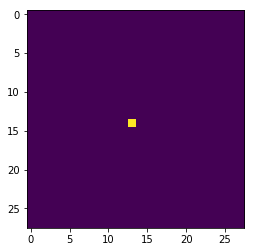

vals:  [0.92283149 0.21221014 0.68056613 0.01680866]


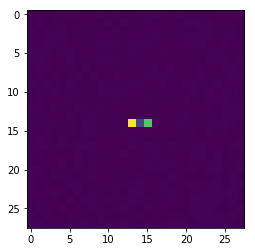

vals:  [0.92293338 0.12426605 0.71482179 0.11544534]


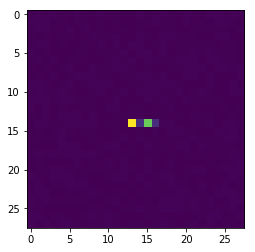

vals:  [0.90127283 0.11507872 0.85677734 0.24005472]


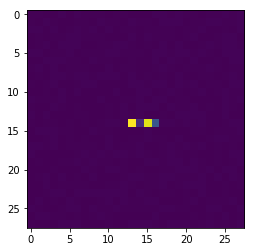

vals:  [0.68412513 0.22128568 0.91547217 0.25339721]


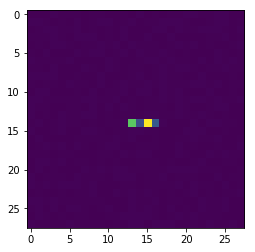

vals:  [0.54683325 0.00342196 0.87220992 0.33411886]


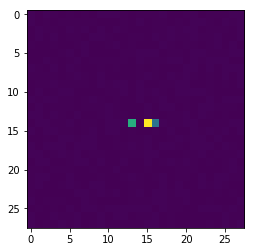

vals:  [0.32680397 0.08645542 0.07928614 0.94595901]


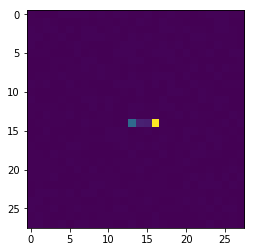

vals:  [0.34338205 0.04038927 0.13114632 0.87959621]


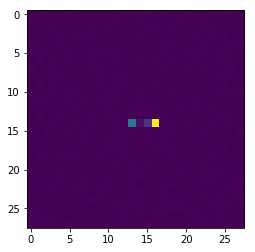

vals:  [0.   0.   0.   0.99]


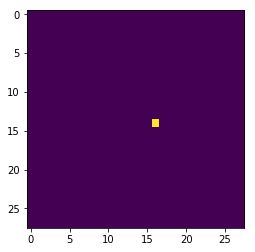

IndexError: index 9 is out of bounds for axis 0 with size 9

In [35]:
for i in range(10):
    print('vals: ', (g[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(g[0][i,:].reshape([28,28]))
    plt.show()

vals:  [0.99 0.   0.   0.  ]


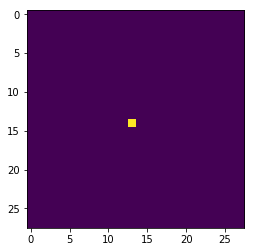

vals:  [0.86563161 0.01120007 0.08986279 0.05825532]


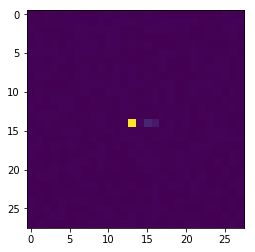

vals:  [0.77587696 0.03342338 0.14108973 0.09110241]


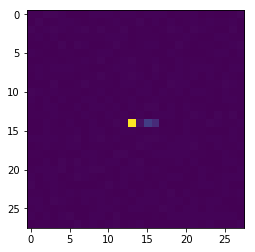

vals:  [0.73519535 0.05011469 0.13071035 0.11834788]


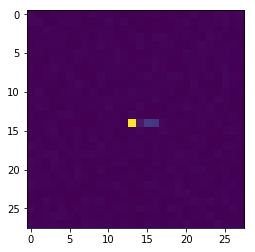

vals:  [0.70341623 0.03229329 0.19958755 0.15644076]


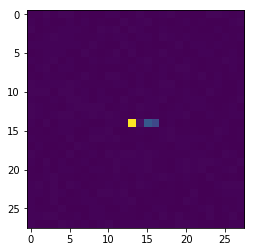

vals:  [0.56044779 0.02166287 0.04190077 0.51174418]


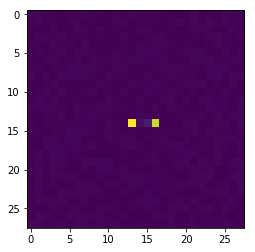

vals:  [0.50598771 0.06609378 0.04893544 0.54649687]


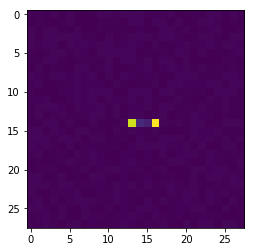

vals:  [0.38184238 0.18991754 0.02808425 0.62224161]


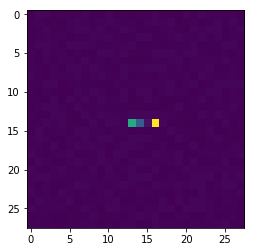

vals:  [0.33884562 0.10665919 0.07795759 0.70163999]


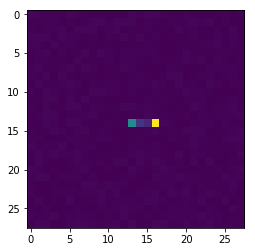

vals:  [0.31730042 0.02443899 0.09310646 0.74728889]


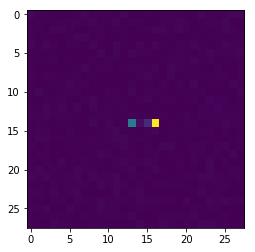

vals:  [0.   0.   0.   0.99]


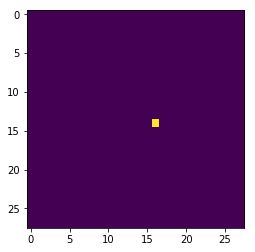

IndexError: index 11 is out of bounds for axis 0 with size 11

In [195]:
for i in range(12):
    print('vals: ', (g[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(g[0][i,:].reshape([28,28]))
    plt.show()

vals:  [0.99 0.   0.   0.  ]


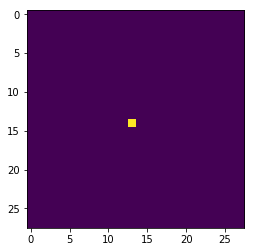

vals:  [0.89322914 0.0258978  0.07431816 0.03745431]


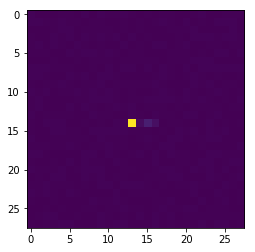

vals:  [0.84774881 0.08013581 0.00704519 0.04480662]


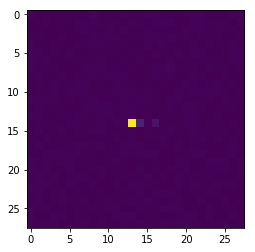

vals:  [0.8026704  0.05131468 0.06203184 0.0952519 ]


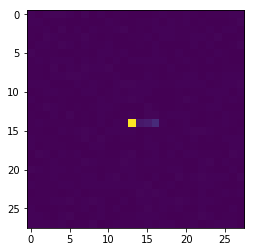

vals:  [0.77887185 0.00191164 0.0706076  0.1697303 ]


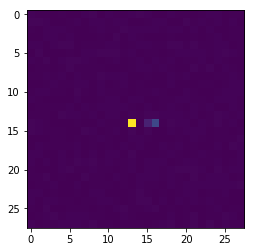

vals:  [0.7099744  0.02119786 0.04776594 0.24147297]


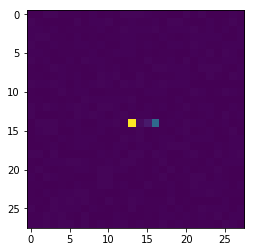

vals:  [0.44003935 0.19102197 0.01274198 0.54769714]


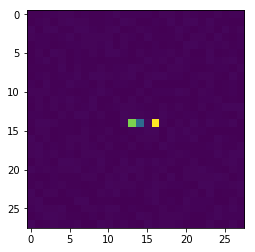

vals:  [0.33825352 0.12093382 0.01294946 0.72112251]


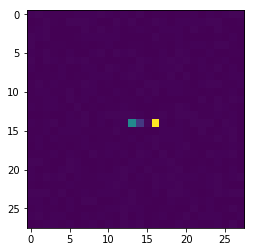

vals:  [0.30663997 0.15392832 0.01178288 0.74495123]


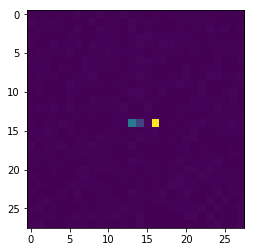

vals:  [0.13578062 0.16352127 0.00597944 0.84326244]


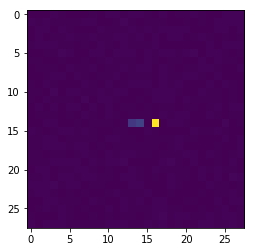

vals:  [0.   0.   0.   0.99]


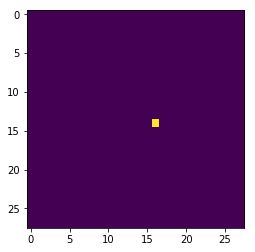

IndexError: index 11 is out of bounds for axis 0 with size 11

In [191]:
for i in range(12):
    print('vals: ', (gs[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(gs[0][i,:].reshape([28,28]))
    plt.show()

In [37]:
g[1]

[1.0818588935413311,
 0.27296968349356315,
 0.26105279047134083,
 0.26922793573082143,
 0.23931887494779788,
 0.24087970710216944,
 0.26323238913957225]

In [36]:
g[1]

[1.0818588935413311,
 0.7306066932739135,
 0.7298237581963594,
 0.7085707844250273,
 0.694213155672221,
 0.664062789047502,
 0.4881677071705946]

In [149]:
def distance_geod_array_n(geod):
    print("integrating geodesic")
    length = []
    for i in range(len(geod)-1):
        length.append(integrate.romberg(lambda t: interp_integrand(geod[i], geod[i+1], t), 0, 1, tol=1e-2, rtol=1e-4))

    return np.asarray(length)

In [148]:
distance_geod_array(g[0])

integrating geodesic


array([0.08362657, 0.020454  , 0.06523444, 0.04837138, 0.07629724,
       0.10663188, 0.01188472, 0.07566748])

In [150]:
distance_geod_array_n(g[0])

integrating geodesic


array([0.15016905, 0.020454  , 0.06966814, 0.04837138, 0.07629724,
       0.17149885, 0.01188472, 0.08360862])

In [151]:
np.sum(distance_geod_array_n(g[0]))

integrating geodesic


0.6319519959618655

In [199]:
integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=[14,13]), make_pix_pic(coords=[14,14]), t), 0, 1, tol=1e-2, rtol=1e-5)

1.3774325277238346

In [200]:
integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=[14,14]), make_pix_pic(coords=[14,15]), t), 0, 1, tol=1e-2, rtol=1e-5)

0.7468880749108882

In [30]:
s_coord = [14,16]
m_coord = [14,17]
f_coord = [14,18]
divfac=1.
one = integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=s_coord), make_pix_pic(coords=m_coord), t)/divfac, 0, 1, tol=1e-2, rtol=1e-5)+integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=m_coord)/divfac, make_pix_pic(coords=f_coord), t), 0, 1, tol=1e-2, rtol=1e-5)
two = integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=s_coord), make_pix_pic(coords=f_coord), t), 0, 1, tol=1e-2, rtol=1e-5)
print("segmented: ", one)
print("not segmented: ", two)

segmented:  0.0009306210107172876
not segmented:  0.000377684147969602


In [ ]:
p_one=[0.75567701, 0.4655615, 0.0, 0.0]
p_two=[0.86567701,  0.04728986, 0.35655615, 0.01647769]
mid_pic = apply_padding(p_one)
fin_pic = apply_padding(p_two)

In [46]:

s_coord = [14,13]
m_coord = [14,17]
f_coord = [14,16]
l = integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=s_coord), mid_pic, t)/divfac, 0, 1, tol=1e-2, rtol=1e-5)
r = integrate.romberg(lambda t: interp_integrand(mid_pic, fin_pic, t), 0, 1, tol=1e-2, rtol=1e-5)
one = l+r
two = integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=s_coord), fin_pic, t), 0, 1, tol=1e-2, rtol=1e-5)
print('left: ', l)
print('right: ', r)
print("segmented: ", one)
print("not segmented: ", two)

left:  0.9908971755339459
right:  0.07242143761665065
segmented:  1.0633186131505965
not segmented:  1.0829309365862


In [34]:
type(x)

list

In [111]:
integrate.quad(lambda t: interp_integrand(make_pix_pic(coords=[14,15]), make_pix_pic(coords=[14,16]), t), 0, 1)

/Users/michaelmcdermott/.local/share/virtualenvs/python-_2MbXz7b/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.4207014225163964, 0.004397416618628802)

In [146]:
integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=[14,14]), make_pix_pic(coords=[14,15]), t), 0, 1, tol=1e-2, rtol=1e-5)

0.7468880749108882

In [137]:
integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=[14,15]), make_pix_pic(coords=[14,16]), t), 0, 1, tol=1e-1, rtol=1e-3)

0.4390294041128579

In [144]:
integrate.romberg(lambda t: interp_integrand(make_pix_pic(coords=[14,14]), make_pix_pic(coords=[14,16]), t), 0, 1, tol=1e-1, rtol=1e-3)

1.0073274221002335

In [162]:
for i in range(10):
    print('vals: ', (gn[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(g[0][i,:].reshape([28,28]))
    plt.show()

NameError: name 'gn' is not defined